# BAIT 509: Business Applications of Machine Learning
## Lecture 8 - Support vector machines and multi-class classification
Tomas Beuzen, 29th January 2020

# Lecture outline
- [0. Recap (5 mins)](#0)
- [1. Lecture learning objectives](#1)
- [2. The Maximal Margin Classifier (10 mins)](#2)
- [3. Support Vector Classifiers (25 mins)](#3)
- [--- Break --- (10 mins)](#break)
- [4. Support Vector Machines (20 mins)](#4)
- [5. Multi-class Classification Problems (15 mins)](#5)
- [6. Remaing time is to work on your final project!](#6)

# Announcements
- Assignment 1 grades released
- Assigntment 3 has been released, **due next Friday 7th Feb, 11:59pm**

# 0. Recap  (5 mins) <a id=0></a>

- Translating business questions -> statistical questions
- Sklearn pipelines

# 1. Lecture learning objectives <a id=1></a>

- Understand the concepts of Maximum Margin Classifiers, Support Vector Classifiers, and Support Vector Machines
- Describe how different algorithm handle multi-class classification

# 2. The Maximal Margin Classifier (10 mins)<a id=2></a>

## 2.1 A Conceptual Introduction

- Consider the following dataset of two features and two classes (blue/orange)
- Three linear classifiers are also shown
- Each linear classifier perfectly classifies the training data – which one would you prefer, and why?

<img src='./img/svm_1.png' width="450"> 

- It makes sense to choose a line such that the observations closest to the line/hyperplane are as far away as possible
- This gives us the maximum separation between classes and minimizes the chance that a new observation will be misclassified.
- Note that while we are working with a line here for a 2-dimensional feature space, this separator can be of any dimension:
    - it is a line if we have **2 predictors**
    - it is a plane if we have **3 predictors**
    - more generally, it is a **hyperplane**
- We call the line that gives us the maximum separation the **Maximal Margin Classifier** (MMC)
- Another way to think about the MMC is to define the line that gives us the biggest margin before touching an observation

<img src='./img/svm_2.png' width="1000"> 

## 2.2 Making Predictions

- So **Line 3** above is our Maximal Margin Hyperplane
- How can we use it to make predictions?
- Well:
    - If $(x_1, x_2)$ is *above* the line, predict <font color="blue">**BLUE**</font>
    - If $(x_1, x_2)$ is *below* the line, predict <font color="orange">**ORANGE**</font>
- How can we automate this classification procedure?

- We can write our MMC as an equation:

$$\beta_0+\beta_1x_1+\beta_2x_2=0$$

- If the left-hand-side of the equation is **positive** (above the line), predict <font color="blue">**BLUE**</font>
- If the left-hand-side of the equation is **negative** (below the line), predict <font color="orange">**ORANGE**</font>
- It's fairly straight-forward to get this equation, but we won't go into the details here, see [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/) Section 9.1.4 for more.

- For the above classifier the equation of the line is:
$$3.45-0.50x_1+0.17x_2=0$$
- Consider the point $(0, -2)$:
$$3.45-0.50*0+0.17*-2=3.11 > 0 = BLUE$$
- Consider the point $(10, -6)$:
$$3.45-0.50*10+0.17*-6=-2.57 < 0 = ORANGE$$
- You might have noticed that this equation not only tells us which class to predict but also gives us a measure of confidence, the greater the magnitude of the left-hand-side, the further away from the separating hyperplane it is
- **But what happens when our data is not easily separated by a line?**

# 3. Support Vector Classifiers (25 mins)<a id=3></a>

## 3.1 A Conceptual Introduction

- Support Vector Classifiers (or SVC) are more realistic in the sense that they don’t require perfect separability of the data
- Consider the following data:

<img src='./img/svm_3.png' width="450"> 

- A SVC fits a line (or in general, a hyperplane) that “best” separates the data in some way
- The idea is to again choose the line that results in the biggest margin
- The only problem is, there’s no such thing as a maximal margin for a given line anymore...
- So what we do is apply a penalty to points that are misclassified, and try to find the margin that gives us the lowest total penalty
- Let's take a look at an example
- Below I've plotted a line and a margin (not necessarily a “maximal” margin – just some random margin that I chose)

<img src='./img/svm_4.png' width="450"> 

- Observations that are both correctly classified and outside of the “margin” do not receive any penalty
- Observations that are correctly classified, but within the margin, receive a penalty equal to the proportion of the way through the margin they are
- The numbered observations in the above plot receive a penalty:
    - Penalty between 0 and 1: observations 2, 4
    - Penalty between 1 and 2: observation 5
    - Penalty greater than 2: observations 1, 3
    - Add up the penalties to obtain a total penalty.

- If we choose a maximum allowable total penalty, say **C**, then we can choose the maximum margin allowable before exceeding **C**
- Note that, for the above plot, observations 1-6 are called **support vectors**, because they are the only ones used to define the separating hyperplane

## 3.2 In-class Exercise

- Consider the following data:

<img src='./img/svm_5.png' width="450"> 

1. How would you classify a new observation that has **feature_1=6** and **feature_2=10**?
2. What size is the margin here?
3. Which observations receive a penalty? Which observations are the support vectors?
4. What is the total penalty here?
5. Can I choose a bigger margin if my total allowable penalty is 6?
6. What are the support vectors for this margin?
7. Are the data linearly separable? If so, what are the support vectors for that line?
8. How does C relate to the bias-variance trade-off?

# -------- Break (10 mins) -------- <a id="break"></a>

# 4. Support Vector Machines (20 mins)<a id=4></a>

## 4.1 A Conceptual Introduction

- Unfortunately, in the real world, data is rarely linearly separable, so a linear decision boundary is not useful for classification
- Consider the below data, it is obviously separable - just not linearly, so how would you fit a Support Vector Classifier to this data?

<img src='./img/svm_6.png' width="450"> 

- Recall in linear regression, that we can fit shapes other than straight lines by transforming the predictors, such as adding powers of the predictor to get polynomials.
- We do something similar in Support Vector Machines
- Essentially, we compute the relationship between data points in a "high dimensional space"
- For example, let's create a new "feature" called "feature_3" using the equation:
$$feature\_3=feature\_1^2+feature\_2^2$$
- Let's plot all 3 features on a 3D graph:

<img src='./img/svm_8.png' width="450"> 

- And from one side...

<img src='./img/svm_7.png' width="450"> 

- We can see now that the data is linearly separable in this "higher dimensional space"
- We can now use a Support Vector Classifier to classify the data!
- The details of how exactly a Support Vector Machine "enlarges" the feature space are quite technical and outside the scope of this course
- Briefly, SVMs use "kernels" for this, the two most common kernels being:
    - The polynomial kernel, more [here](https://www.youtube.com/watch?v=Toet3EiSFcM)
    - The radial-basis-function (RBF) kernel, more [here](https://www.youtube.com/watch?v=Qc5IyLW_hns)
- You will explore kernels a bit in Assignment 3
- Conceptually, you can think of Support Vector Machines as performing 3 steps:
    1. Start with data in some dimension *d*
    2. Transform the data into a higher dimension *>d*
    3. Use a Support Vector Classifier to separate the data
- Note that MMC and SVC are special cases of SVM

## 4.2 A Brief Example

- The below code defines some made-up data for this example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
import sys
sys.path.append('code/')
from model_plotting import plot_model, plot_svc, plot_svc_grid
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.axisbelow'] = True
x1 = [13, 13, 13, 11, 8, 10, 10, 11, 7, 13]
y1 = [11, 7, 11, 9, 4, 8, 11, 11, 9, 12]
x2 = [6, 4, 6, 4, 6, 4, 5, 9, 3, 10]
y2 = [5, 7, 7, 9, 5, 3, 6, 6, 7, 3]

ModuleNotFoundError: No module named 'statsmodels'

- Let's plot the data:

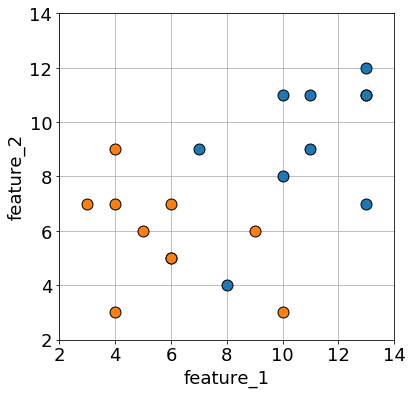

In [4]:
plt.subplots(1,1,figsize=(6,6))
plt.scatter(x1, y1, marker='o', s=120, edgecolor='k')
plt.scatter(x2, y2, marker='o', s=120, edgecolor='k')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.xlim(2, 14)
plt.ylim(2, 14)
plt.grid();

- Support Vector Classifiers are located within the `svm` module of sklearn

In [5]:
from sklearn.svm import SVC

- I am going to define a basic SVC - a SVM with a linear kernel and some `C` which I've chosen to be 1
- **Note that in sklearn the margin width is inversely proportional to C** (opposite to how we conceptually introduced SVC earlier)
    - Large `C` reduces the margin
    - Small `C` increases the margin

In [6]:
model = SVC(C=1, kernel='linear')

In [7]:
X = pd.DataFrame({'x1': [13, 13, 13, 11, 8, 10, 10, 11, 7, 13, 6, 4, 6, 4, 6, 4, 5, 9, 3, 10],
                   'x2': [11, 7, 11, 9, 4, 8, 11, 11, 9, 12, 5, 7, 7, 9, 5, 3, 6, 6, 7, 3]})
y = pd.DataFrame({'class': ['blue']*10 + ['orange']*10})
model.fit(X, y)
plot_model(X, y, model)

alt.LayerChart(...)

- It's interesting to see our margins and how changing the value of `C` changes our classifier

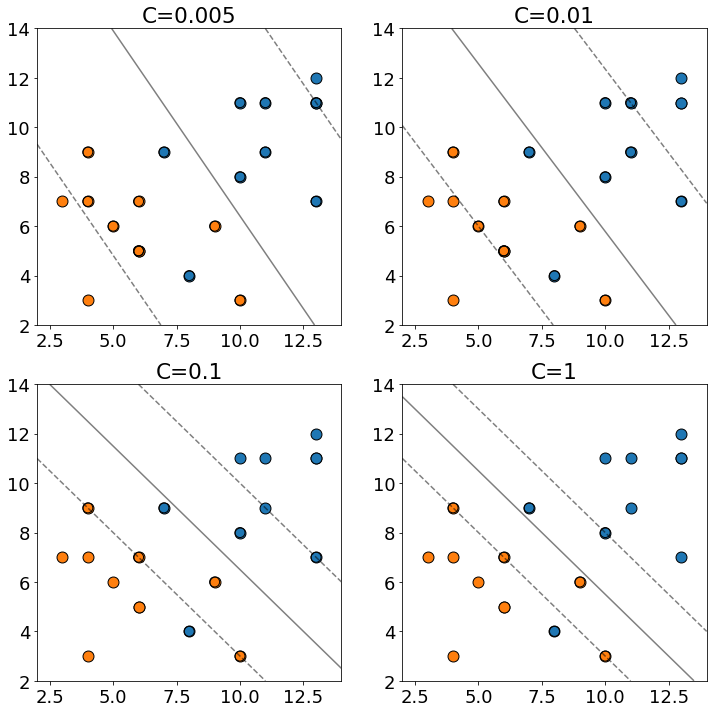

In [8]:
plot_svc_grid(x1, y1, x2, y2, X, y, C = [0.005, 0.01, 0.1, 1])

- Choosing the best `C` is usually done with cross-validation
- If `C` is too large (the margin is very narrow) we might overfit our data
- If `C` is too small (the margin is very large) we might underfit our data

- We can actually visualise the decision boundary of a non-linear SVM too but it's hard to interpret
- What happens is that the line we draw in higher dimensional space is "projected back" to the original "lower-dimensional" space

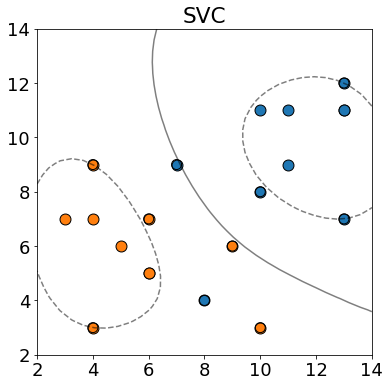

In [9]:
model = SVC(C=1, kernel='rbf').fit(X, y)
plt.figure(figsize=(6,6))
plot_svc(x1, y1, x2, y2, model)

- You'll play with SVMs more in Assignment 3

In [80]:
np.random.seed(123)
x1 = np.random.randint(-100,100,30)/100
y1 = np.random.randint(-100,100,30)/100
x2 = np.random.randint(-300,300,80)/100
y2 = np.random.randint(-300,300,80)/100
z = x1**2 + y1**2
x1 = x1[z>0.25]
y1 = y1[z>0.25]
z = x2**2 + y2**2
x2 = x2[z>3]
y2 = y2[z>3]
X = pd.DataFrame({'x1': np.append(x1, x2),
                  'x2': np.append(y1, y2)})
y = pd.DataFrame({'class': ['C0']*16 + ['C1']*60})

code/model_plotting.py:235: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


(-5, 5)

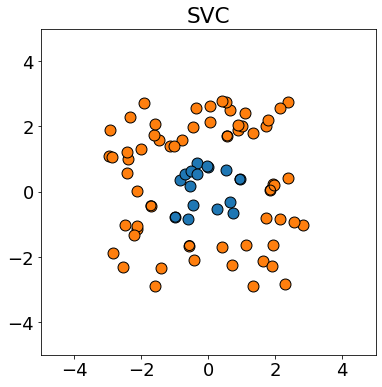

In [51]:
model = SVC(C=1000, kernel='rbf').fit(X, y)
plt.figure(figsize=(6,6))
plot_svc(x1, y1, x2, y2, model)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [100]:
def plot_rbf_decision_boundary(X, y, model):
    """
    Plot the decision boundary of a sklearn SVC mode1.
    
    Parameters
    ----------
    X : datatype
        A 2-column dataframe of the features.
    y : datatype
        A dataframe of the response.
    model : datatype
        A fitted SVC model.
    
    Returns
    -------
    plot
        A matplotlib plot of "model"s decision function.
    """
    
    # we need a grid to help us plot the decision function
    xx1, xx2 = np.meshgrid(np.linspace(X.min()[0]-2, X.max()[0]+2, 200),
                           np.linspace(X.min()[1]-2, X.max()[1]+2, 200))
    # use the model to calculate predictions across the grid
    Z = model.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    # make the plot
    plt.subplots(1,1,figsize=(8,8))
    plt.scatter(X[X.columns[0]], X[X.columns[1]], s=140, ec='k', c=y[y.columns[0]], zorder=3) # plot raw data
    plt.pcolormesh(xx1, xx2, -Z, cmap='RdBu', zorder=0) # plot decision function
    plt.ylim(-4.5, 4.5)
    plt.xlim(-4.5, 4.5)
    plt.xlabel('feature_2')
    plt.ylabel('feature_1')    

Text(0.5, 1.0, 'rbf kernel')

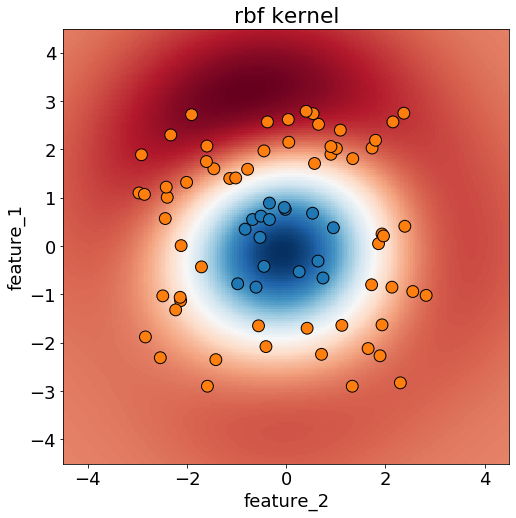

In [109]:
model = SVC(C=0.0001, kernel='rbf').fit(X, y)
plot_rbf_decision_boundary(X, y, model)
plt.title('rbf kernel')

# 5. Multi-class Classification Problems (15 mins)<a id=5></a>

- Often we will come across problems where there are more than two classes to predict
- We call these multi-class problems 
- There are a few ways of dealing with these outlined below

## 5.1 Native handling

- Some algorithms can natively support multi-class classification, for example:
    - Tree-based algorithms
    - KNN
    - Naive Bayes
- Below is an example of a Decision Tree Classifier used to classify 3 labels

<img src='./img/multi_class_dt.png' width="550">

- And here's the graph:

<img src='./img/multi_class_dt_graph.png' width="450">

- Here's an example of KNN:

<img src='./img/multi_class_knn.png' width="550">

## 5.2 One-vs-One

- Other models, like SVMs and Logistic Regression don't natively support multi-class classification
- Instead, we use One-vs-One or One-vs-Rest apporaches to help us
- One-vs-One fits a model to all pairs of categories
- If there are 3 classes ("blue", "red", "orange"), we fit a model on:
    - blue vs red
    - blue vs orange
    - red vs orange
- So we have 3 models in this case, or in general $\frac{n*(n-1)}{2}$
- For 100 classes, we fit 4950 models!
- All models are used during prediction and the classification with the most “votes” is predicted
- Computationally expensive, but can be good for models that scale poorly with data, because each model in OvO only uses a fraction of the dataset

## 5.3 One-vs-Rest

- The more common approach to multi-class classification is OvR
- It's the default for most sklearn algorithms, e.g., LogisticRegression, SVM
- This approach fits a model for each category against all “others”
- For *n* classes, that means we need *n* models in total, e.g.:
    - blue vs (red & orange)
    - red vs (blue & orange)
    - orange vs (blue & red)
- Each class now has it's own classifier! So we use all models to make a prediction, and then choose the cateogry with the highest prediction/probability/confidence

# 6. Remaing time is to work on your final project! <a id=6></a>